In [1]:
import numpy as np
import pandas as pd 

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit

np.random.seed(42)



In [2]:
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
df = pd.DataFrame({fname: values for fname, values in zip(iris["feature_names"], X.T)})
df["target"] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train = np.concatenate((np.ones(len(X)).reshape( len(X), 1) 
                     , X)  , axis = 1)
X_train.shape

(150, 5)

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
def Encode_target(y):
    
    onehot_object = OneHotEncoder(sparse = False)
    Y_encoded = onehot_object.fit_transform(y.reshape(-1,1))
    return Y_encoded

In [6]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches



In [7]:
def softmax_vectorized(X_train , Y_encoded , y_actual , reg , alpha , Epochs,num_of_spilts):
    
    #Intializing
    m = X_train.shape[0]
    W = np.random.random(((5,3)))

    Cost = 0.0
    Costs = []
    
    
    batch_size = m//num_of_spilts
    X_Batches  = Generate_Batches(X_train , batch_size)
    y_encod_batches  = Generate_Batches(Y_encoded , batch_size)
    y_act_batches  = Generate_Batches(y_actual , batch_size)
    #Calculating Hypothesis function - standrize scores - getting probabilities
    for i in range(Epochs):
        if i > 2 and np.abs(Costs[i-1]-Costs[i-2]) < 0.001:
            break
        for X_train ,y_actual, Y_encoded  in zip(X_Batches ,y_act_batches, y_act_batches):   
            Scores = X_train.dot(W)
            Scores -= np.max(Scores)
            Y_Prop = np.exp(Scores)/np.sum(np.exp(Scores) , axis=1).reshape(-1,1)
            Cost = (-1/m)*np.sum(np.log(Y_Prop[np.arange(len(y_actual)) , y_actual]))
            Grad = 1/m * X_train.T.dot((Y_Prop - Y_encoded.reshape(-1,1)))
            W -= alpha*Grad

            #Using Regulaizing
            Cost += reg * np.sum(W * W)
            W += reg * 2 * W

            Costs.append(Cost)

    
    return W , Costs

In [8]:
Y_encoded = Encode_target(y)
W , cost = softmax_vectorized(X_train ,Y_encoded , y , 0.0000002 , 0.001 , 100 , 5)

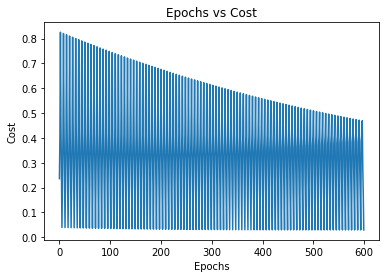

In [9]:
import matplotlib.pyplot as plt
plt.plot(cost)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Epochs vs Cost")
plt.show()

In [10]:
split = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
    
    # Use strat_train_set and strat_test_set to train and evaluate your model
    
    
    
    